# CSE 5243 Introduction to Data Mining
## LAB 1: Exploratory Data Analysis
### `Bharat Suri (suri.40@osu.edu)`
### `Nithin Senthil Kumar (senthilkumar.16@osu.edu)`
#### Taught By: Michael Burkhardt
#### Date: 09/12/19

## 2. Understanding the Context of Data

We considered the following questions as given in the instructions:
* Why was this data collected?
* What does each record represent?
* Where did the data originally come from?
* What is the principal question that our data mining task seeks to answer?
* Are there other questions that we might be able to answer with this data?
* How will you know if you have mined useful data from it?
* How would you measure the effectiveness of a good analysis?

The dataset was originally collected to solve a prediction task. This was a binary classification task in which the model predicted whether the input record is of a person who makes over \$ 50K a year or not. A census is an official count or survey of the population, where a number of details regarding each individual are collected. 

Since the study was focused on classifying whether a person's annual income was in a certain bracket or not based on their information, the US Census was an appropriate choice as a dataset. Each record in a census represents one person and the information about that person is given by the attributes or fields in the dataset. Fields such as Age, Work Class, Native Country and Education. These fields serve to answer questions such as what demographic they belong to, what their education levels are, what profession they belong to and their marital status. 

The data was originally extracted from the 1994 US Census database and the extraction was done by **Barry Becker**. Provided with the database, our data mining task seeks to extract useful information and insights from the database, and to present our insights in a clear and concise way. The data consists of records about people who were a part of the census, and with this data we can try to answer other questions such as:

* Could there be a relationship between a person's occupation, education level and salary.
* Evaluate the diversity of the population.
* We can look for biases and inequalities with respect to age, sex and race.
* Predicting the average income of the *household* based off the gross income, relationship status and other attributes.
* Using the same target attribute, we can predict the income of a person using a regressor.

We can say that the data which has been mined is useful if it coherently performs well in classifying the records and achieves good accuracy in doing so. The analysis is effective if it not only performs the task, but also looks at each data point and checks for associations among different attributes. It should also examine any correlations between those attributes and deal with any anomalies. Therefore, the effectiveness of a good analysis can be measured with the help of observing its performance in the real world on various data-driven models. If the analysis is thorough and reports the findings in a crisp and concise way, then it is said to be effective.

**INSIGHTS**
* US census data has records for individuals per household and is a very good source for the task.
* The income of a person can vary based on other information, such as education.
* The fnlwgt could provide useful information that reveals a correlation between occupation and demographics.

#### Part 2 Highlights
From the initial look at the data, we found that:
* The delimiter was ', ' and not ','
* Extra whitespaces were removed while reading the data
* '?' was also changed to Nan values to make the analysis smooth
* Data in capital-gain and capital-loss appeared to be highly skewed
* Three attributes, fnlwgt, capital-gain, and capital-loss, had high variance (visualized later)
* There were no direct strong correlations between the numeric data
* There was an imbalance in class variable
* Number of instances with less than or equal to 50K income was much higher than the ones with income greater than 50K
* The mean value for capital-gain for both target classes had a significant difference

Following code is for these highlights...

In [1]:
# Importing required libraries for the lab

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

In [2]:
# These are the columns according to the description presented by Ronny Kohavi and Barry Becker

columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'class'
]

In [3]:
# Reading the csv file

df = pd.read_csv('data/adult.data',
                 sep='\s*,\s*',
                 engine='python',
                 names=columns,
                 index_col=None,
                 na_values=['?'])

In [4]:
# To view the first 3 records of the data

df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


##### Summary statistics of numeric columns
* 90% of the population polled were under 58 years of age with the average age being 38.58
* 90% of the population worked fewer than 55 hours per week with the average being 40 hours per week
* About 50% of the population had attended some form of college or higher and less than 20% had a HS degree or lower
* The measure of mean, std deviation and percentiles show that values for capital-gain and capital loss are very skewed possibly signifying that this is a sparse column. More than 90% of the population has a capital-gain/capital-loss of 0.
* Correlation between numeric attributes do not signify a strong correlation between any of the attributes

In [5]:
# Basic statistics of Numerical attributes

pd.options.display.float_format = '{:.2f}'.format
df.describe(percentiles=np.arange(0.1, 1, 0.1))

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
10%,22.00,65716.00,7.00,0.00,0.00,24.00
20%,26.00,106648.00,9.00,0.00,0.00,35.00
30%,30.00,130856.00,9.00,0.00,0.00,40.00
40%,33.00,158662.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
60%,41.00,196338.00,10.00,0.00,0.00,40.00


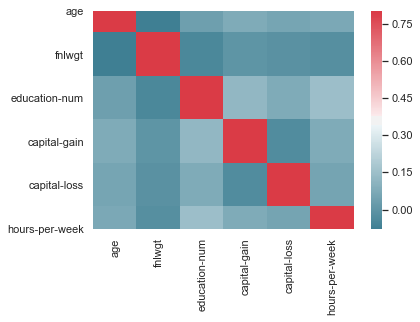

In [6]:
matrix = df.corr()
colormap = sns.diverging_palette(220,10, as_cmap=True)
plot = sns.heatmap(matrix, cmap=colormap, vmax=0.8, square=True)
plt.show()

From the correlation matrix, we can see that there exists no direct strong correlation between any of the numeric attributes.

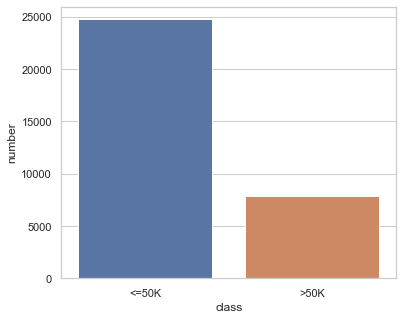

In [7]:
# This is to see what is the distribution of the target class

fig = plt.figure(figsize=(6, 5))
plot = sns.barplot(df['class'].unique(), df['class'].value_counts())
xl = plt.xlabel('class')
yl = plt.ylabel('number')
plt.show()

There is a class imbalance in the target class.

## 3. Understanding the Data

### Highlights of Part 3
#### Verifying Data Quality
* The original dataset had its missing values replaced by '?'
* List of attributes that had missing values: **workclass, occupation, native-country**
* Number of these missing values were **1836, 1843, and 583** respectively
* Boxplots showed that some attributes had high variance because of multiple outliers.
* These attributes were **fnlwgt, capital-gain, capital-loss**
* Distplots show the highly skewed nature of **capital-gain and capital-loss**
* **47 duplicate** records were found in the dataset
* A discrepancy we observed was that one **male** record had **relationship as wife** and two **female** records had **relationship as husband**.
* There are inconsistent records and will have to be dropped.
* Another discrepancy was that people who had **Never Worked** had values **greater than 0** for the attribute **hours-per-week**

#### Dealing with the missing values and duplicate records
* Missing values in this case are categorical. This means that we cannot fill in those values, thus, the records will have to be dropped if the model uses workclass, occupation or native-country to predict the target class.
* Duplicate records are simply dropped by taking the first instance as the original one and dropping the rest.

### Meaning and Type of Data attributes
* __Age__: It is an integer that tells us the age of the person. ___( Numeric data of Continuous Ratio type )___
* __Work Class__: It describes the working class of the person. ___( Categorical data of Nominal type )___
* __Final Weight__: According to the description, "". It defines a quantifiable parameter for every person that encapsulates the significance of their demographic characteristics. ___( Numeric data of Ratio type )___
* __Education__: It describes the level of education of the person. ___( Categorical data of Ordinal type )___
* __Education Num__: It is the enumeration of _Education_ attribute. ___( Numeric data of Interval type )___
* __Marital Status__: It describes the current marital status of the person. ___( Categorical data of Nominal type )___
* __Occupation__: It describes the work-profile of the person and gives us an idea about their day-to-day job. ___( Categorical data of Nominal type )___
* __Relationship__: It describes how the person is related to the household. ___( Categorical data of Nominal type )___
* __Race__: It defines the race of the person. ___( Categorical data of Nominal type )___
* __Sex__: It tells us whether the person is Male or Female. ___( Categorical data of Binary type )___
* __Capital Gain__: It describes the net profits of the person through any medium other than the salary. ___( Numeric data of Continuous Ratio type )___
* __Capital Loss__: It describes the net losses of the person through any medium other than the salary. ___( Numeric data of Continuous Ratio type )___
* __Hours per Week__: It is the number of hours in a week that a person is employed for. ___( Numeric data of Continuous Ratio type )___
* __Native Country__: It tells us which country the person originates from. ___( Categorical data of Discrete Nominal type )___
* __Class__: It is the income class that the person belongs to. This is the attirbute that is predicted in the final classification task. ___( Categorical data of Binary type )___

### Verify Data Quality

In [8]:
# Datatype and number of non-null records

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Counting the null values in the dataset

for c in df:
    if df[c].isnull().values.any():
        print(c, df[c].isnull().sum())

workclass 1836
occupation 1843
native-country 583


age


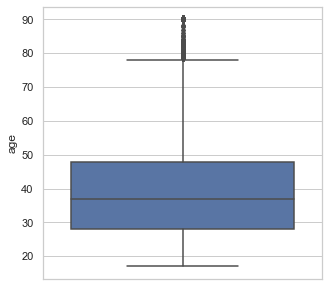

fnlwgt


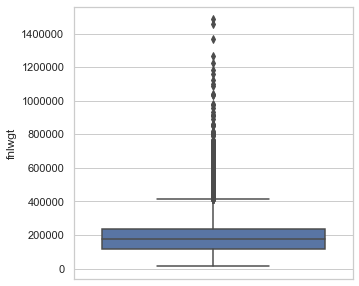

education-num


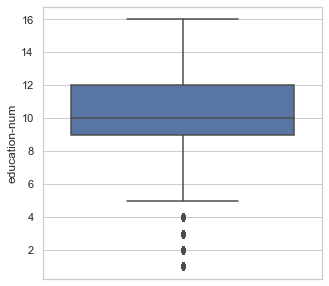

capital-gain


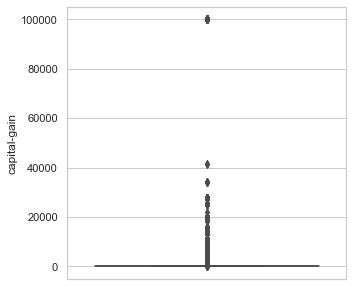

capital-loss


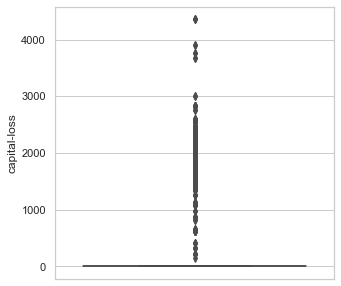

hours-per-week


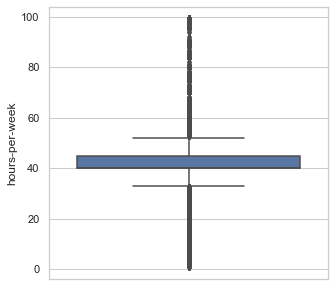

In [10]:
# Boxplots to observe which attributes have the most outliers

for c in df:
    if df[c].dtype is np.dtype('int64'):
        print(c)
        fig = plt.figure(figsize=(5, 5))
        plot = sns.boxplot(y=df[c])
        y = plt.ylabel(c)
        plt.show()

Inferences from the boxplots:
* People who are more than 80 years old can be regarded as outliers
* fnlwgt has a high number of data points outside the IQR range
* Most of the records have the hours-per-week between 35-55

By eliminating the outliers, we can obtain better values of mean for the Hours worked per week and age attributes.

In [11]:
# Trimming the means by considering values within 3 times the standard deviation for age and hours worked 

df_trimmed = df[np.abs(df.age-df.age.mean()) <= (3*df.age.std())]
df_trimmed = df_trimmed[np.abs(df_trimmed['hours-per-week']-df_trimmed['hours-per-week'].mean()) <= (3*df_trimmed['hours-per-week'].std())]
print("After Trimming")
df_trimmed.groupby('class').mean()

After Trimming


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
class,,,,,,
<=50K,36.50,190587.48,9.60,146.43,52.74,38.55
>50K,44.18,188181.96,11.61,3987.84,194.73,44.90


In [12]:
# Before Trimming

print("Before Trimming")
df.groupby('class').mean()

Before Trimming


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
class,,,,,,
<=50K,36.78,190340.87,9.60,148.75,53.14,38.84
>50K,44.25,188005.00,11.61,4006.14,195.00,45.47


Not a significant change in the mean indicating few outliers beyond 3 STD

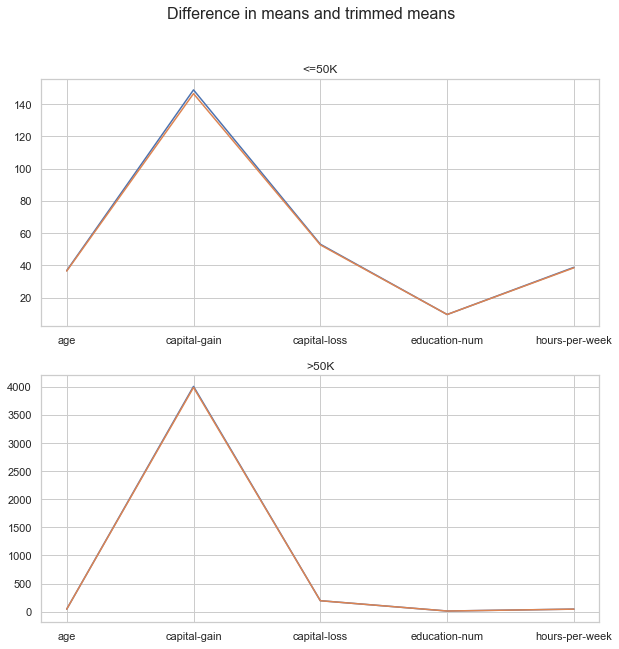

In [13]:
c1 = df.groupby('class').mean().drop('fnlwgt', axis=1).iloc[0].to_list()
c2 = df_trimmed.groupby('class').mean().drop('fnlwgt', axis=1).iloc[0].to_list()
c3 = df.groupby('class').mean().drop('fnlwgt', axis=1).iloc[1].to_list()
c4 = df_trimmed.groupby('class').mean().drop('fnlwgt', axis=1).iloc[1].to_list()
l = df.groupby('class').mean().drop('fnlwgt', axis=1).iloc[0].index.to_list()

fig = plt.figure(figsize=(10, 10))
t = fig.suptitle('Difference in means and trimmed means', fontsize=16)

s1 = plt.subplot(2, 1, 1)
t1 = s1.title.set_text('<=50K')
p1 = sns.lineplot(l, c1)
p2 = sns.lineplot(l, c2)

s2 = plt.subplot(2, 1, 2)
t2 = s2.title.set_text('>50K')
p3 = sns.lineplot(l, c3)
p4 = sns.lineplot(l, c4)

plt.show()

age


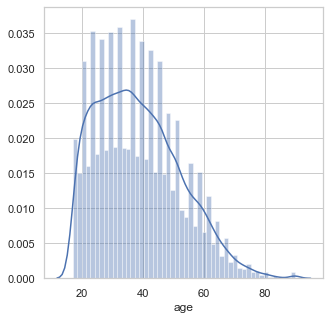

fnlwgt


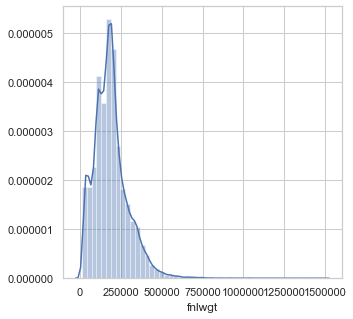

education-num


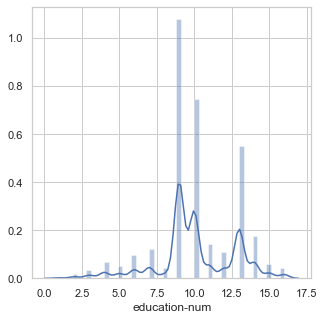

capital-gain


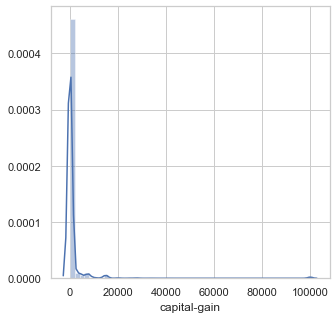

capital-loss


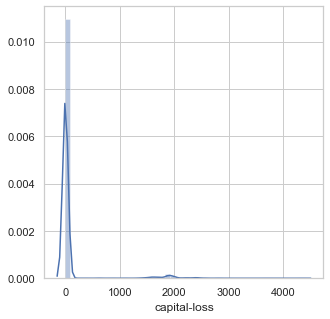

hours-per-week


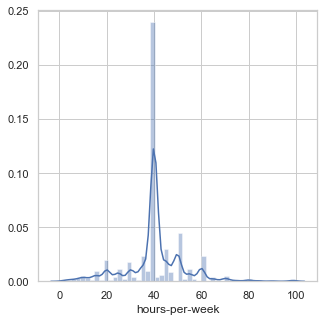

In [14]:
# Distplots to check for skewness of data and to visualize its distribution. 

for c in df:
    if df[c].dtype is np.dtype('int64'):
        print(c)
        fig = plt.figure(figsize=(5, 5))
        plot = sns.distplot(df[c])
        x = plt.xlabel(c)
        plt.show()

We can use Distplots to measure skewness of Data. This will draw a histogram and fit a kernel density estimate (KDE) over the distribution.
* Capital gain gain and capital loss are visibly highly skewed towards zero which indicates that they could be regarded as sparse attributes

Another important measure of data quality is to eliminate duplicate records. We found that there were **47** duplicate records. These records will be dropped in the later sections.

In [15]:
# Finding if the data has duplicate records and their number, if any
if df.duplicated(keep=False).any():
    dup = df.duplicated(keep=False).sum()
    print('There are {} duplicates.'.format(dup))
else:
    print('There are no duplicate records.')

There are 47 duplicates.


We also need to validate the data to find any discrepancies or inconsistencies that would render a record illogical.
* We see that there is one entry for **husband where the sex is Female** and two entries for **wife where the sex is Male.**
* We also see inconsistencies which show that **7 people who have never worked, have values in the hours-per-week column**. All of them earn below 50K. These values should either be dropped or we should change their hours worked to 0.

In [16]:
# Finding discrepancies and inconsistencies in the data

pd.crosstab(df['relationship'], df['sex'])

sex,Female,Male
relationship,,
Husband,1,13192
Not-in-family,3875,4430
Other-relative,430,551
Own-child,2245,2823
Unmarried,2654,792
Wife,1566,2


In [17]:
df[df['workclass']=='Never-worked'][['workclass', 'occupation', 'hours-per-week', 'class']]

,workclass,occupation,hours-per-week,class
5361,Never-worked,NaN,40,<=50K
10845,Never-worked,NaN,35,<=50K
14772,Never-worked,NaN,30,<=50K
20337,Never-worked,NaN,10,<=50K
23232,Never-worked,NaN,40,<=50K
32304,Never-worked,NaN,40,<=50K
32314,Never-worked,NaN,4,<=50K


### Basic Statistics

The mode and the frequency distribution is printed for each attribute, plotted for all categorical attributes except Native Country and Class.

Attribute:  workclass
Mode:  ['Private']


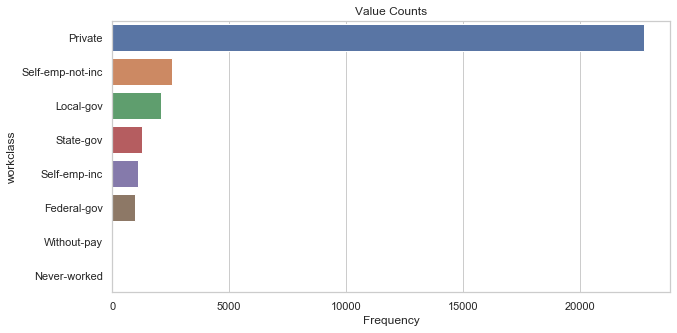

Attribute:  education
Mode:  ['HS-grad']


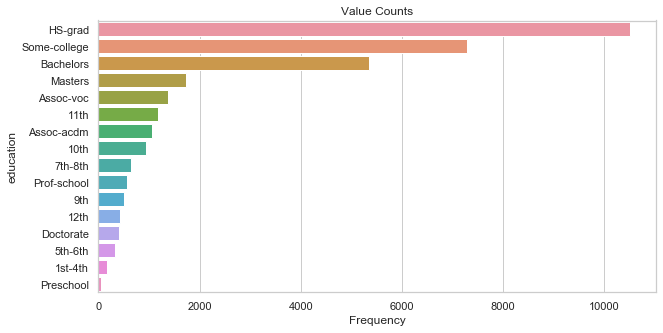

Attribute:  marital-status
Mode:  ['Married-civ-spouse']


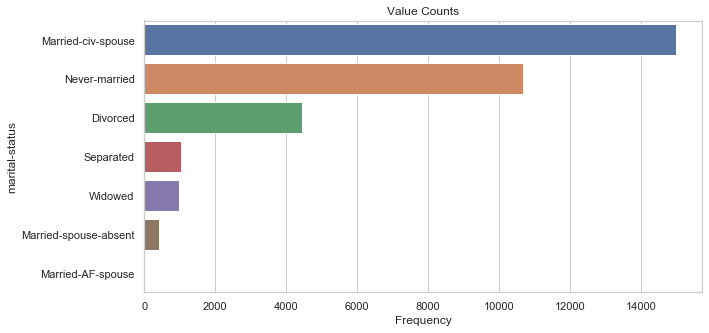

Attribute:  occupation
Mode:  ['Prof-specialty']


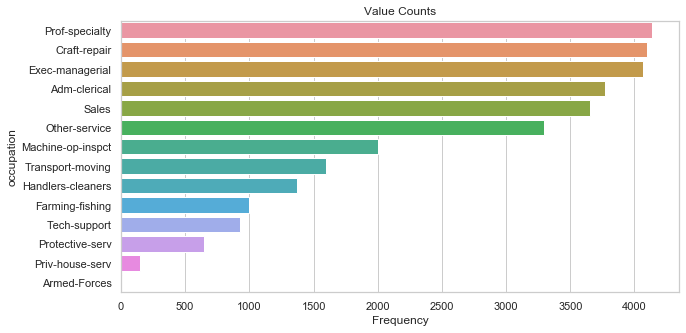

Attribute:  relationship
Mode:  ['Husband']


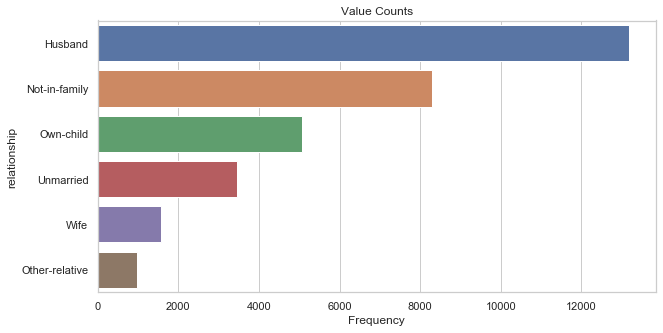

Attribute:  race
Mode:  ['White']


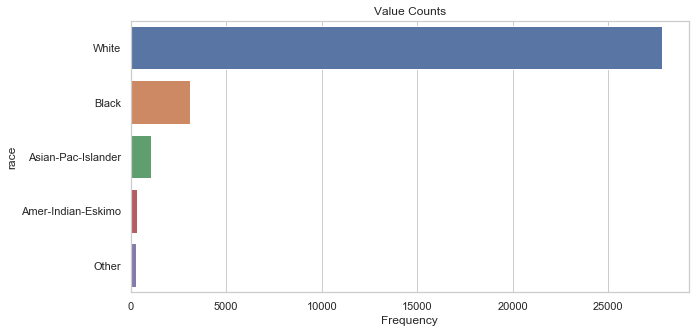

Attribute:  sex
Mode:  ['Male']


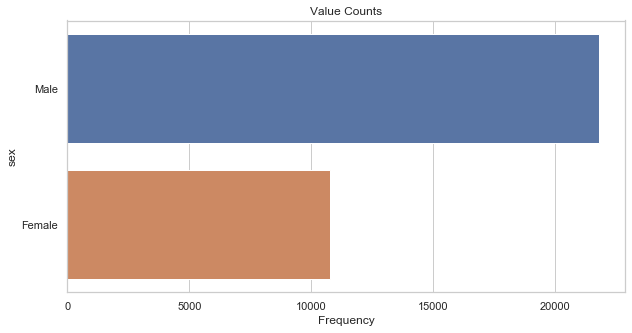

In [18]:
# Value counts for the categorical attributes

for c in df:
    if (not df[c].dtype is np.dtype('int64')) and (c not in ['native-country', 'class']):
        print('Attribute: ', c)
        print('Mode: ', df[c].dropna().mode().values)
        data = df[c].value_counts()
        fig = plt.figure(figsize=(10, 5))
        plot = sns.barplot(x=data.values, y=data.index)
        y = plot.set_ylabel(c)
        x = plot.set_xlabel('Frequency')
        t = plt.title('Value Counts')
        plt.show()

#### Significance of measuring basic stats
Measuring basic statistics in a dataset is important because it gives an overview of the entire data along each attribute. This covers the most common value, the mean value, and the spread of the data for any given numeric attribute. This can be used to narrow down the search for the attributes that have a good amount of spread, that is, they provide some useful information that can be learned to make predictions. Variance is important because if an attribute has no variance, then there exists no pattern in that attribute that can be learned.
#### Highlights of Basic Statistics
* **age**: 36 was the most recurring age for the population. This could be because most young adults participate in the census.
* **hours-per-week**: We found that 40 was the most common value which made sense because majority of full-time employment is for 8 hours a day for 5 days a week.

Given the high variance and wide range for fnlwgt, capital-gain, and capital-loss, we observed that it was not that meaningful to study the basic statistics for those attributes.

In [19]:
# Stats of numeric data

for c in df:
    if (df[c].dtype is np.dtype('int64')):
        print('Attribute: ', c)
        print('Mean: ', df[c].mean())
        print('Variance: ', df[c].var())
        print('Standard Deviation: ', df[c].std())
        print('Count: ', df[c].count())
        print('Mode: ', df[c].mode().values)
        print('Median: ', df[c].median())
        print('\n')

Attribute:  age
Mean:  38.58164675532078
Variance:  186.0614002488016
Standard Deviation:  13.640432553581341
Count:  32561
Mode:  [36]
Median:  37.0


Attribute:  fnlwgt
Mean:  189778.36651208502
Variance:  11140797791.841892
Standard Deviation:  105549.97769702224
Count:  32561
Mode:  [123011 164190 203488]
Median:  178356.0


Attribute:  education-num
Mean:  10.0806793403151
Variance:  6.618889907032931
Standard Deviation:  2.5727203320673877
Count:  32561
Mode:  [9]
Median:  10.0


Attribute:  capital-gain
Mean:  1077.6488437087312
Variance:  54542539.17840535
Standard Deviation:  7385.292084840338
Count:  32561
Mode:  [0]
Median:  0.0


Attribute:  capital-loss
Mean:  87.303829734959
Variance:  162376.9378136497
Standard Deviation:  402.9602186489998
Count:  32561
Mode:  [0]
Median:  0.0


Attribute:  hours-per-week
Mean:  40.437455852092995
Variance:  152.45899505045418
Standard Deviation:  12.347428681731843
Count:  32561
Mode:  [40]
Median:  40.0




### Visualize interesting attributes

In [20]:
# For this section, we chose the following attributes

att = ['age',
       'sex',
       'education',
       'capital-gain',
       'capital-loss',
       'workclass']

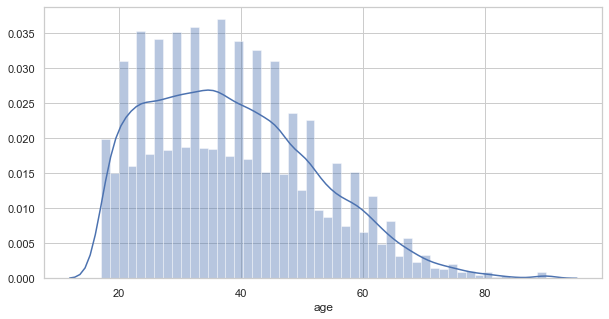

In [21]:
fig = plt.figure(figsize=(10, 5))
plot = sns.distplot(df['age'])
plt.show()

**Interpretation**: The figure above shows the distribution of age using distplot. We can see by just looking at the graph that most of the population are between 20 and 60 years old which is interesting. It is also corroborated by our findings in the percentiles.

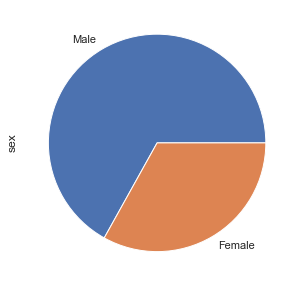

In [22]:
fig = plt.figure(figsize=(8, 5))
plot = df['sex'].value_counts().plot.pie()
plt.show()

**Interpretation**: The pie chart simply shows the sex ratio in the population. This can be further used to see if there is any kind of discrimination in the income class, thus it is interesting.

In [23]:
# Table showing mapping between education and education-num
print(df[['education-num','education']].drop_duplicates().sort_values(by=["education-num"]).to_string(index=False))

 education-num     education
             1     Preschool
             2       1st-4th
             3       5th-6th
             4       7th-8th
             5           9th
             6          10th
             7          11th
             8          12th
             9       HS-grad
            10  Some-college
            11     Assoc-voc
            12    Assoc-acdm
            13     Bachelors
            14       Masters
            15   Prof-school
            16     Doctorate


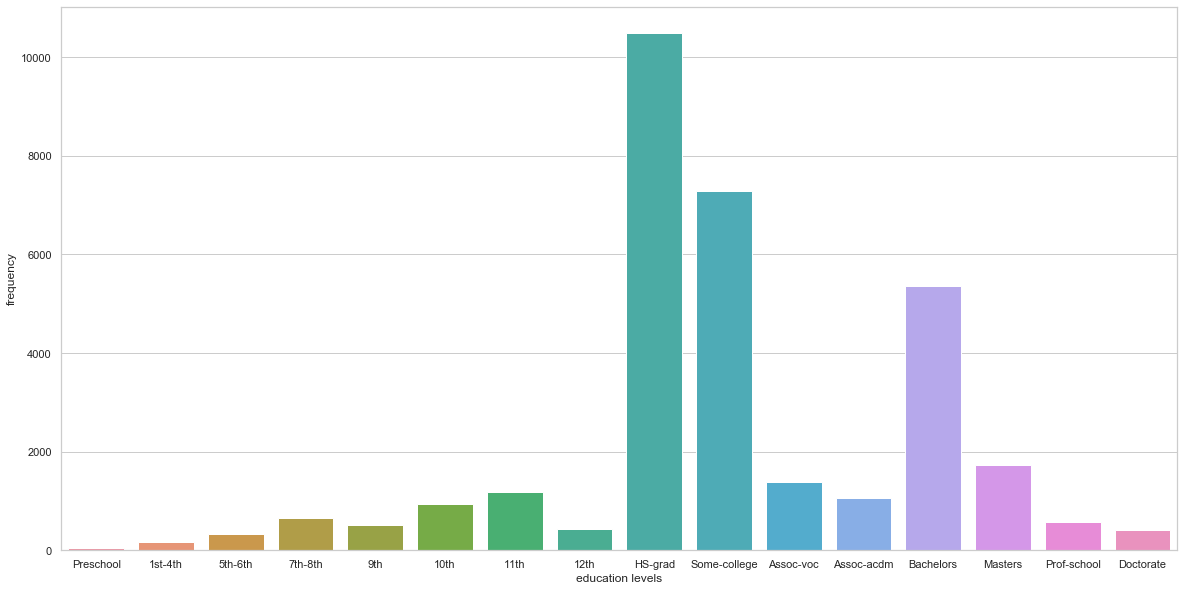

In [24]:
data = df['education-num'].value_counts().sort_index().to_list()
labels = df[['education-num','education']].drop_duplicates().sort_values(by=["education-num"])['education'].to_list()

fig = plt.figure(figsize=(20, 10))
plot = sns.barplot(x=labels, y=data)
x = plt.xlabel('education levels')
y = plt.ylabel('frequency')
plt.show()

**Interpretation**: The graph above is to study the 'education' attribute and it shows that most people are high school graduates, followed by college graduates, people with a Bachelors degree, and then people with a Masters degree.

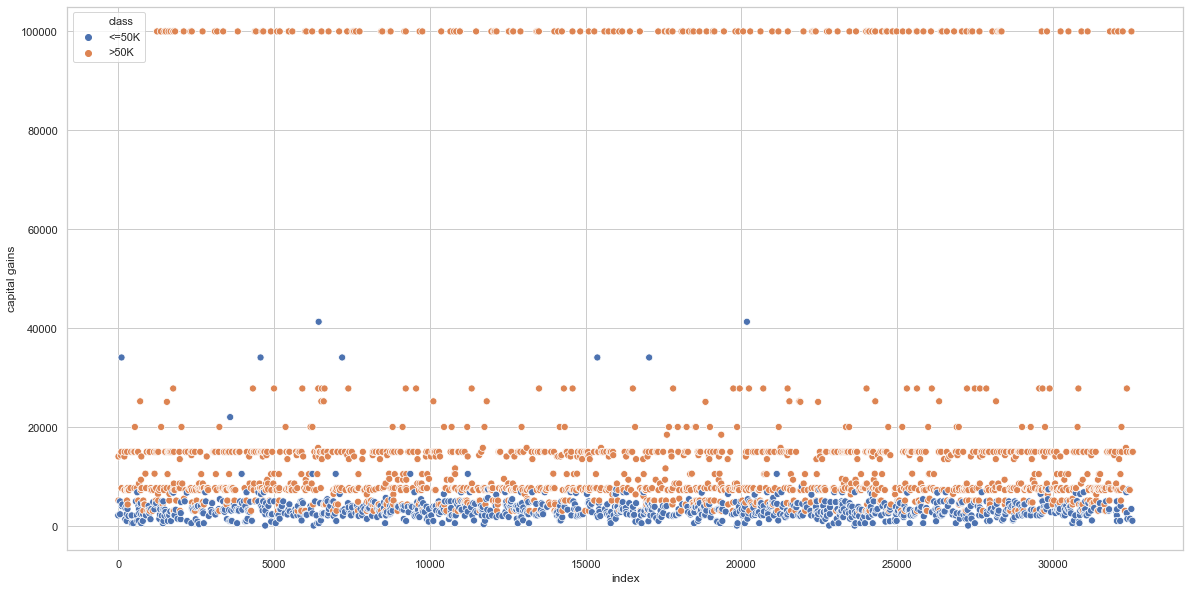

In [25]:
data = df[df['capital-gain'] != 0]

fig = plt.figure(figsize=(20, 10))
plot = sns.scatterplot(x='index', y='capital-gain', data=data.reset_index(), s=50, hue='class')
x = plt.xlabel('index')
y = plt.ylabel('capital gains')
plt.show()

**Interpretation**: Capital gain is an important attribute to determine whether a person has any capital investments or not. Following plots will show that presence of capital funds is correlates with the person earning more than 50K annually. This makes sense because only people who earn above a certain threshold can make such investments and profit from them.

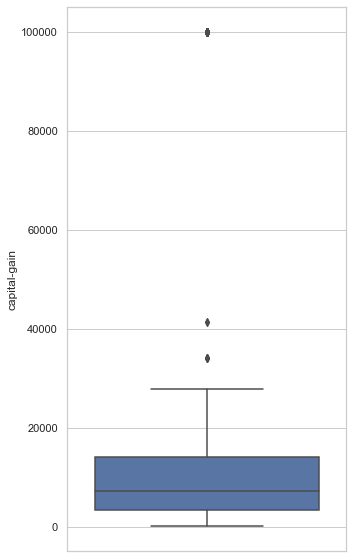

In [26]:
fig = plt.figure(figsize=(5, 10))
plot = sns.boxplot(y='capital-gain', data=data)
plt.show()

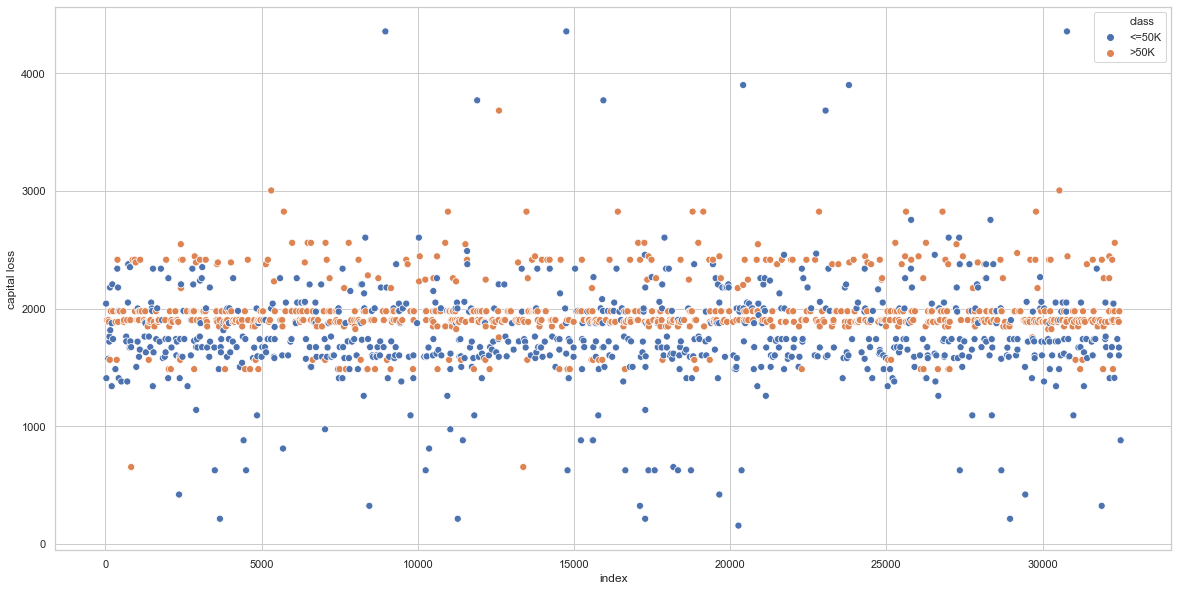

In [27]:
data = df[df['capital-loss'] != 0]

fig = plt.figure(figsize=(20, 10))
plot = sns.scatterplot(x='index', y='capital-loss', data=data.reset_index(), s=50, hue='class')
x = plt.xlabel('index')
y = plt.ylabel('capital loss')
plt.show()

**Interpretation**: There exists a linear shaped cluster at the capital-loss = 2000 line which has a specific class. Thus, the plot gives us an interesting insight.

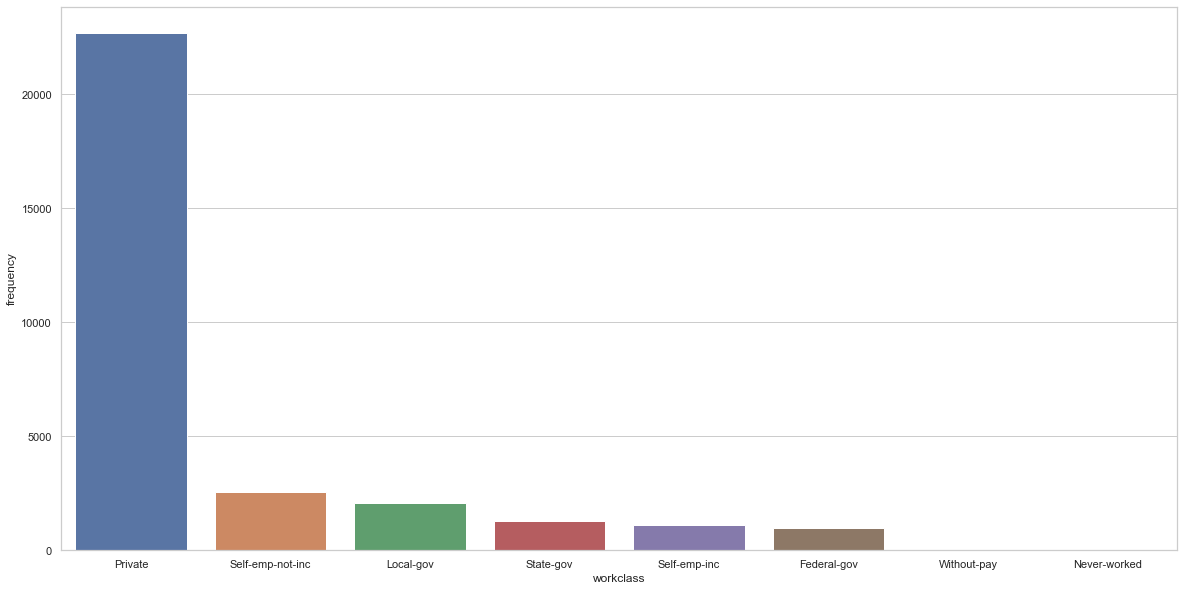

In [28]:
data = df['workclass'].value_counts()

fig = plt.figure(figsize=(20, 10))
plot = sns.barplot(x=data.index, y=data.values)
x = plt.xlabel('workclass')
y = plt.ylabel('frequency')
plt.show()

**Interpretation**: Workclass seems to be an important attribute because it will directly hint at what the annual income of a person will be. The following plot is interesting because from this we can see that the maximum number of people belong to the private sector. Nearly 70 percent of the population belongs to this sector.

### Explore relationships between attributes except class
The dataset describes the population using multiple attributes and relationships can be drawn between these attributes and used to answer other questions that are either closely related or unrelated to the task at hand. Exploring the relationship between these attributes can provide us with valueable insights about the demographic

The following relationships were explored:
1.	Avg working hours of Male vs Female (Bar plot)
2.	Avg working hours grouped by race (Bar plot)
3.  Avg working hours grouped by race and categorized by sex (Line plot)
4.  Avg Working hours vs workclass vs sex (Line plot)
5.  Normalized count of race in each work class (Line Plot)
6.  Avg working hours grouped by marital status and sex
7. Evaluating the average final-weight based on the native-country

8.	Race vs Occupation (Cross tabulation)
3.	Avg working hours grouped by job category (Bar plot)
4.	Avg working hours grouped by Relationship status (Bar plot)
5.	Education vs Capital Gain (Cross tabulation)
6.	Education vs Capital Loss (Cross tabulation)
7.	Race vs Education (Cross tabulation)
9.	Group by Sex and scatter plot with Age and Working hours (Scatter Plot)
10.	Avg age grouped by Occupation (Bar plot)
11.	Occupation vs Education (Cross tabulation)

To start off, a pairplot was plotted to get an overview of the correlations among different numeric attributes.

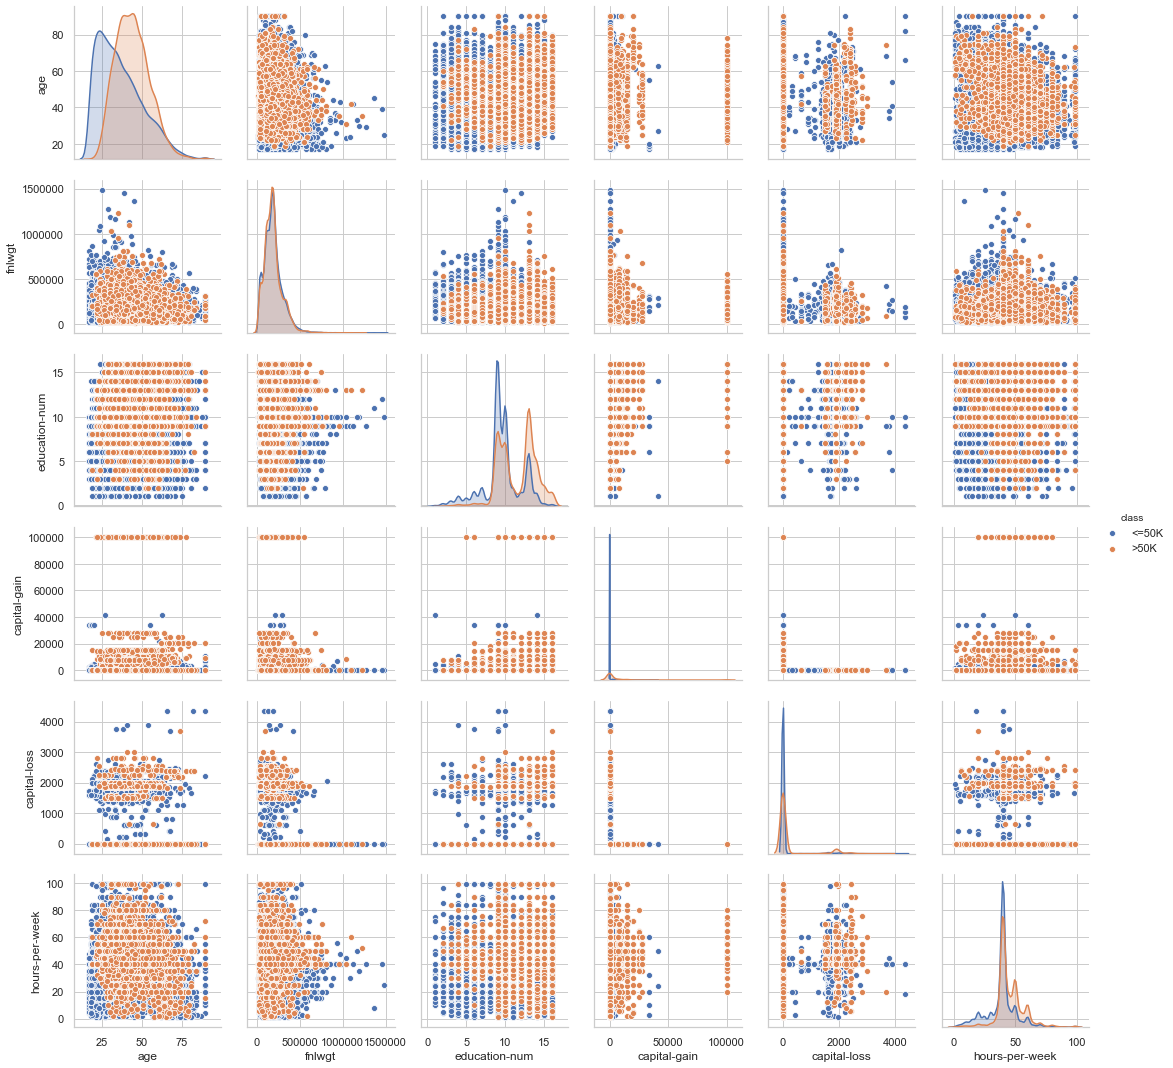

In [29]:
plot = sns.pairplot(df, hue='class')
plt.show()

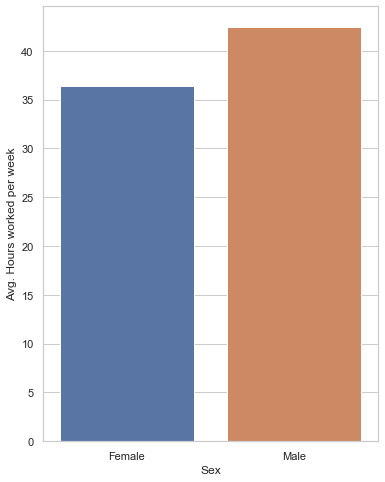

In [30]:
# 1. Avg. Working hours per week - Male vs Female (Bar) plot)

fig = plt.figure(figsize=(6,8))
plot = sns.barplot(x=df.groupby('sex').mean()['hours-per-week'].index, y=df.groupby('sex').mean()['hours-per-week'].values,data=df.reset_index())
plot.set(xlabel="Sex", ylabel="Avg. Hours worked per week")
plt.show();

**Interpretation**: On average, from the above graph, we can see that males work for longer hours than females.

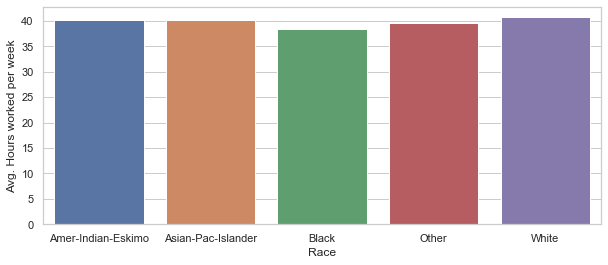

In [31]:
# 2. Avg. Working hours per week against Race (Bar plot)

fig = plt.figure(figsize=(10,4))
plot = sns.barplot(x=df.groupby('race').mean()['hours-per-week'].index, y=df.groupby('race').mean()['hours-per-week'].values,data=df.reset_index())
plot.set(xlabel="Race", ylabel="Avg. Hours worked per week");
plt.show();

**Interpretation**: We see that people from all races work more or less 40 hours on average. There is no striking difference here

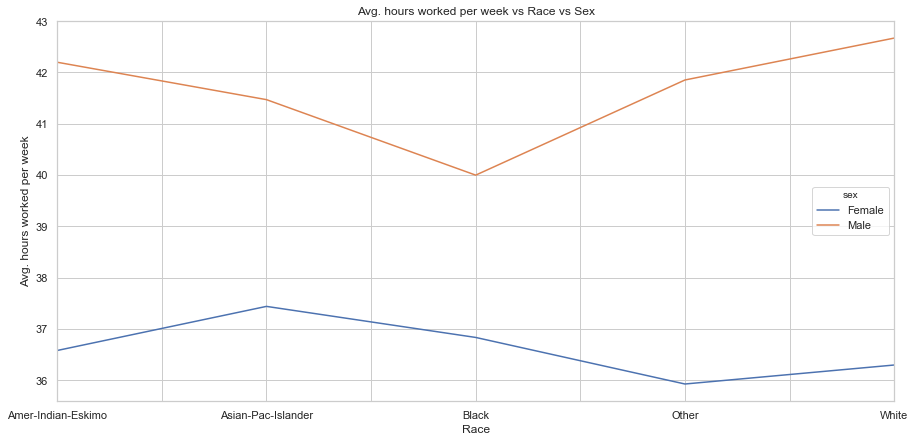

In [32]:
# Plot data for average hours worked vs race that is categorized into males and females
# 3. Working hours vs race

fig, ax = plt.subplots(figsize=(15,7));
df.groupby(['race','sex']).mean()['hours-per-week'].unstack().plot(ax=ax);
ax.set_xlabel("Race");
ax.set_ylabel("Avg. hours worked per week");
ax.set_title("Avg. hours worked per week vs Race vs Sex");

**Interpretation**: Males on average appear to work for longer hours than females. While the difference is not much, the gap is greatest amongst white males and females and least between black males and females

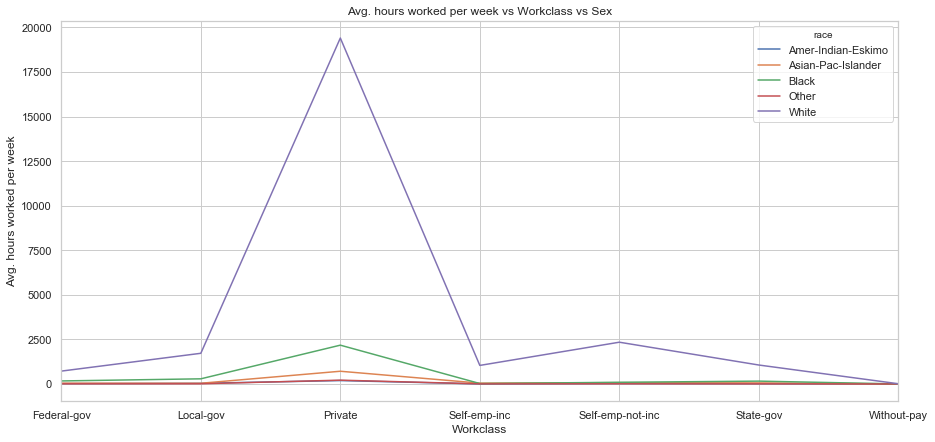

In [33]:
# Plot data for count of race vs occupation
# 4. Working hours vs workclass vs sex

fig, ax = plt.subplots(figsize=(15,7))
df1 = df[df['workclass']!='Never-worked']
pd.crosstab(df1['workclass'],df1['race']).plot(ax=ax);
ax.set_xlabel("Workclass");
ax.set_ylabel("Avg. hours worked per week");
ax.set_title("Avg. hours worked per week vs Workclass vs Sex");

**Interpretation**: Since the values for the white race are much higher than the other races, we can't see it's significance without normalizing.

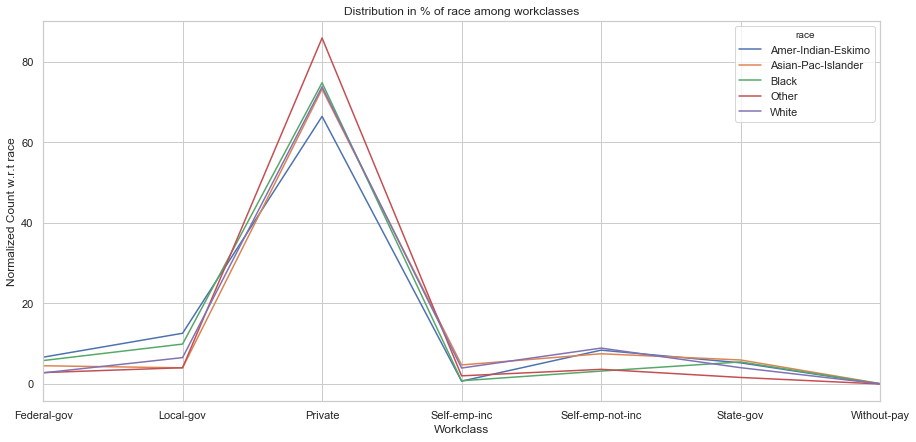

In [34]:
# Finding percentage value of counts for based on race and workclass
#5. normalized count of race in each work class

fig, ax = plt.subplots(figsize=(15,7))
df1 = df[df['workclass']!='Never-worked']
pd.crosstab(df1['workclass'],df1['race']).apply(lambda c: (c / c.sum()) * 100).plot(ax=ax);
ax.set_xlabel("Workclass");
ax.set_ylabel("Normalized Count w.r.t race");
ax.set_title("Distribution in % of race among workclasses");

**Interpretation**: The distribution of race among different work classes are equal

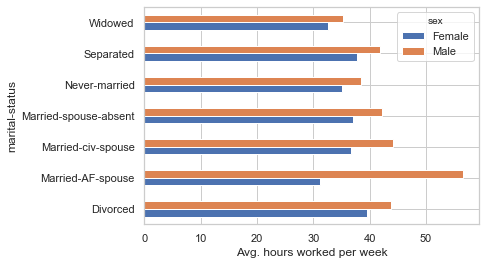

In [35]:
# 6. Average working hours grouped by marital status and sex

ax=df.groupby(['sex','marital-status']).mean()['hours-per-week'].unstack(0).plot.barh();
ax.set_xlabel("Avg. hours worked per week");

**Interpretation**: Comparison of the number of hours per week worked based on the marital status could show us insights into how relationship status affects work. We see that married armed forces males work for significantly higher time compared to other categories.

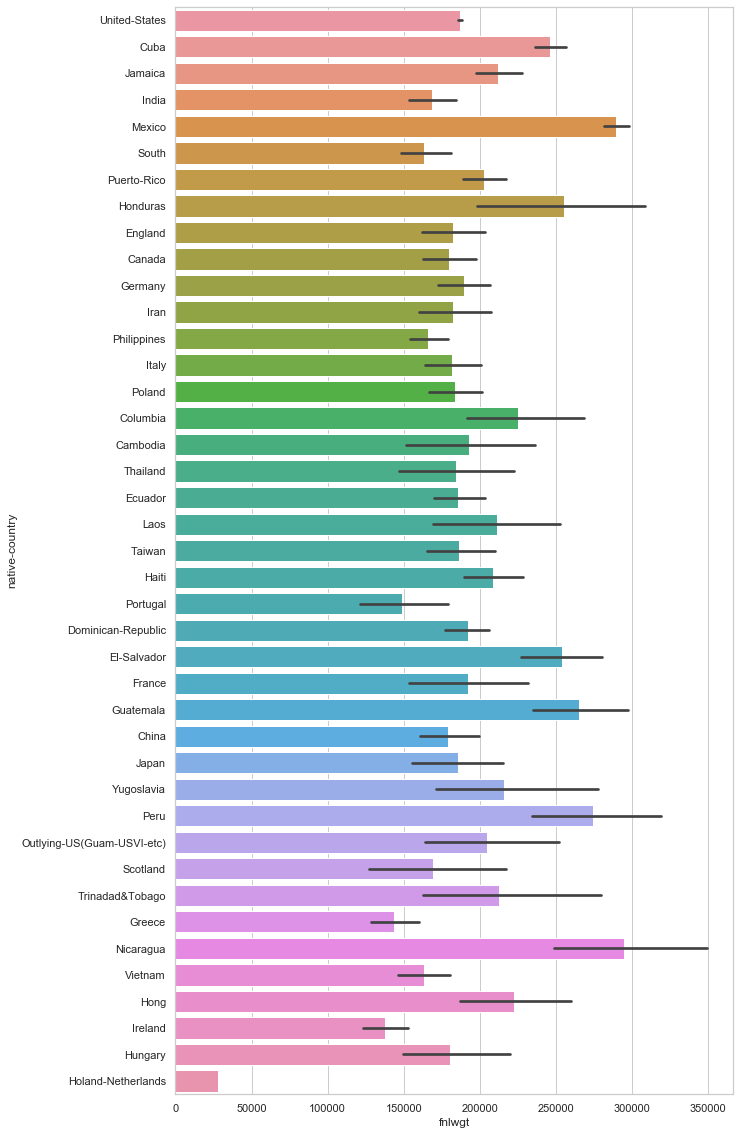

In [36]:
# 7. Evaluating the average final-weight based on the native-country

fig = plt.figure(figsize=(10,20))
plot = sns.barplot(y=df['native-country'], x=df['fnlwgt'])
plt.show()

**Interpretation**: Since final weight indicates the weight that each individual carries based on the demographic, it would be appropriate to visualize how final weight varies based on the country a person originates from.

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
capital-funds,,,,,,,,,,,,,,,,
False,865,1089,403,159,308,582,474,930,1194,4384,284,9415,1300,47,363,6533
True,68,86,30,9,25,64,40,137,188,971,129,1086,423,4,213,758


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
capital-funds,,,,,,,,,,,,,,,,
False,92.71,92.68,93.07,94.64,92.49,90.09,92.22,87.16,86.40,81.87,68.77,89.66,75.45,92.16,63.02,89.60
True,7.29,7.32,6.93,5.36,7.51,9.91,7.78,12.84,13.60,18.13,31.23,10.34,24.55,7.84,36.98,10.40


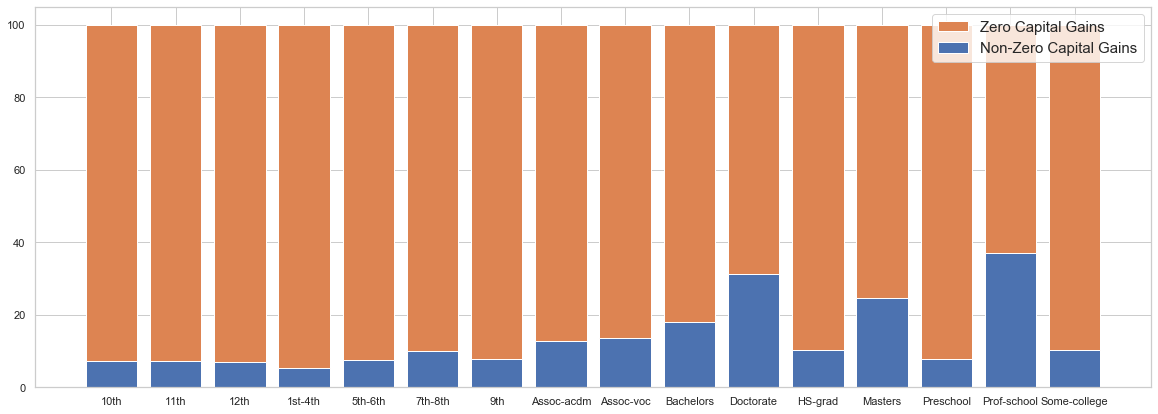

In [37]:
# Education vs Capital Funds
# Created a new binary column called capital funds which shows if a person has either capital gains or losses

df1=df;
df1['capital-funds'] = np.logical_or(df['capital-gain'],df['capital-loss'])
pd.crosstab(df1['capital-funds'],df1['education'])
sub = pd.crosstab(df1['capital-funds'],df1['education']).apply(lambda x: 100*x / x.sum())

sub.iloc[0:2]
x = sub.iloc[0]
y = sub.iloc[1]
fig = plt.figure(figsize=(20, 7));
p1 = plt.bar(y.index, y.values)
p2 = plt.bar(x.index, x.values, bottom=y.values)
legend = plt.legend((p2[0], p1[0]), ('Zero Capital Gains', 'Non-Zero Capital Gains'), fontsize=15)
plt.show()

**Interpretation**: We see that a higher proportion of people with higher education levels, i.e. Master's, doctorate and professional candidates have non salary income sources - Capital Funds which can either be losses or gains.

### Explain relationships between class attributes and others

Relationships between Class and attributes
1.	Class and Education
2.	Class and Race
3.	Class and Sex
4.	Scatter plot between Capital Gain and fnlwgt for class
5.	Scatter plot between hours per week and age for class


#### Class and Education

In [38]:
sub = pd.crosstab(df['class'], df['education-num']).apply(lambda x: 100 * x / x.sum())
sub.iloc[0:2]

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
class,,,,,,,,,,,,,,,,
<=50K,100.00,96.43,95.20,93.81,94.75,93.35,94.89,92.38,84.05,80.98,73.88,75.16,58.52,44.34,26.56,25.91
>50K,0.00,3.57,4.80,6.19,5.25,6.65,5.11,7.62,15.95,19.02,26.12,24.84,41.48,55.66,73.44,74.09


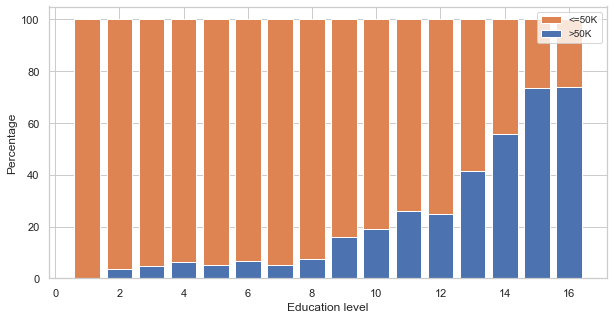

In [39]:
x = sub.iloc[0]
y = sub.iloc[1]

fig = plt.figure(figsize=(10, 5))
p1 = plt.bar(y.index, y.values)
p2 = plt.bar(x.index, x.values, bottom=y.values)
x = plt.xlabel('Education level')
y = plt.ylabel('Percentage')
legend = plt.legend((p2[0], p1[0]), ('<=50K', '>50K'), fontsize=10)
plt.show()

**Interpretation**: The percentage of people earning more than 50K rises as we move up the education levels.

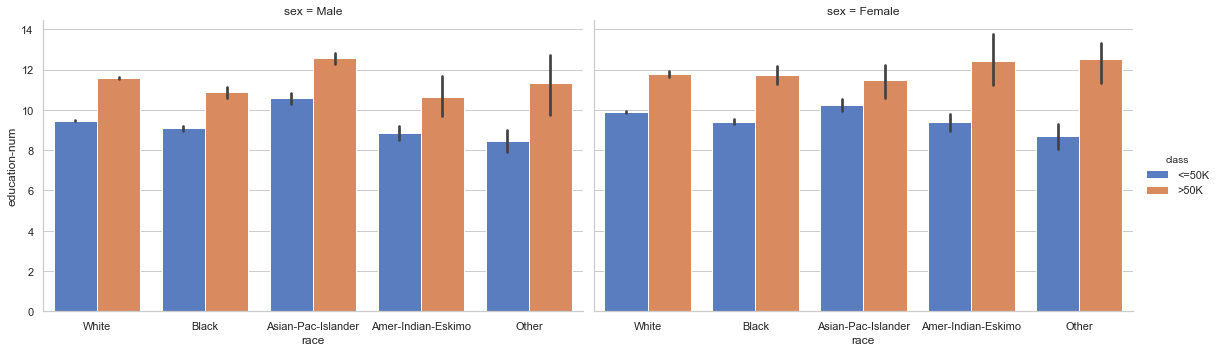

In [40]:
# Relationship between education, Race, Sex and Class

plot = sns.catplot(col='sex',x='race', y='education-num',hue="class", data=df.reset_index(), kind="bar", palette="muted", height=5, aspect=8/5)

**Interpretation**: We can see that the average education level is always higher for people earning more than 50K and it holds true across all races for both the sexes. This also confirms our above inference.

#### Age, Capital gain and Class

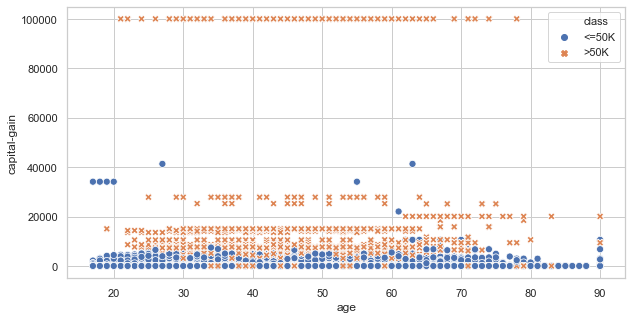

In [41]:
fig = plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x="age", y="capital-gain", hue="class",
                style="class", s=50, data=df.reset_index())
plt.show()

**Interpretation**: There does not seem to be any separation of clusters across the age, however, once we move up past a certain value of capital-gain, there are more people earning more than 50K.

In [42]:
# Percentage of people of work classes vs how much they earn

sub = pd.crosstab(df['class'], df['workclass']).apply(lambda c: (c / c.sum()) * 100)
sub.iloc[0:2]

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
class,,,,,,,,
<=50K,61.35,70.52,100.00,78.13,44.27,71.51,72.80,100.00
>50K,38.65,29.48,0.00,21.87,55.73,28.49,27.20,0.00


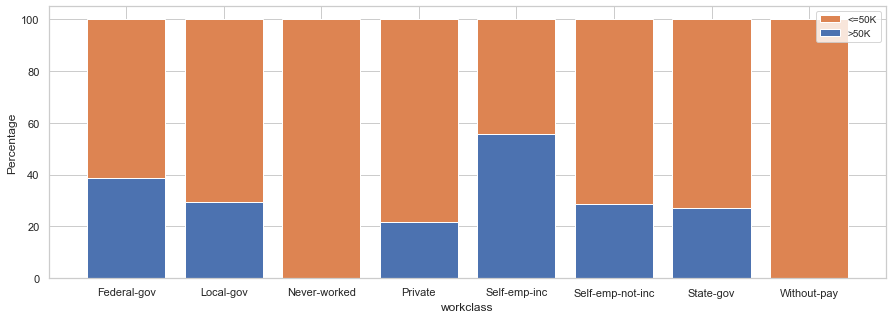

In [43]:
x = sub.iloc[0]
y = sub.iloc[1]

fig = plt.figure(figsize=(15, 5))
p1 = plt.bar(y.index, y.values)
p2 = plt.bar(x.index, x.values, bottom=y.values)
x = plt.xlabel('workclass')
y = plt.ylabel('Percentage')
legend = plt.legend((p2[0], p1[0]), ('<=50K', '>50K'), fontsize=10)
plt.show()

**Interpretation**: People who have an income from self-employment and earning more than 50K were found to have a higher percentage among all the different workclasses.

In [44]:
# Percentage of people of different races vs how much they earn

sub = pd.crosstab(df['class'], df['race']).apply(lambda c: (c / c.sum()) * 100)
sub.iloc[0:2]

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
class,,,,,
<=50K,88.42,73.44,87.61,90.77,74.41
>50K,11.58,26.56,12.39,9.23,25.59


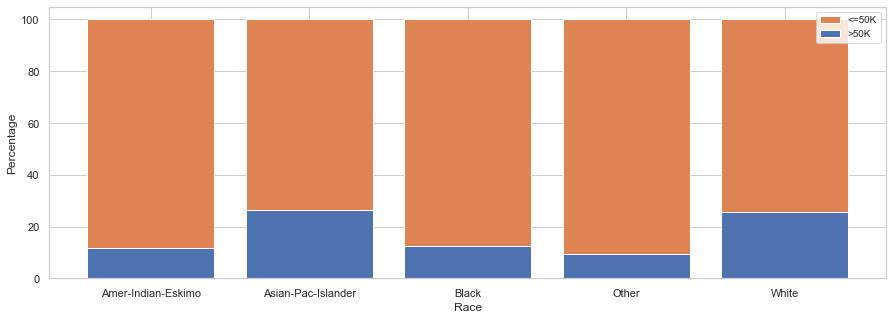

In [45]:
x = sub.iloc[0]
y = sub.iloc[1]

fig = plt.figure(figsize=(15, 5))
p1 = plt.bar(y.index, y.values)
p2 = plt.bar(x.index, x.values, bottom=y.values)
x = plt.xlabel('Race')
y = plt.ylabel('Percentage')
legend = plt.legend((p2[0], p1[0]), ('<=50K', '>50K'), fontsize=10)
plt.show()

**Interpretation**: White people and Asian-Pacific-Islanders who were earning more than 50K were found to have the maximum percentage. It was also observed that most people were earning less than 50K, which led to the class imbalance.

In [46]:
# Percentage of Females and Males respectively

sub = pd.crosstab(df['class'], df['sex']).apply(lambda c: (c / c.sum()) * 100)
sub.iloc[0:2]

sex,Female,Male
class,,
<=50K,89.05,69.43
>50K,10.95,30.57


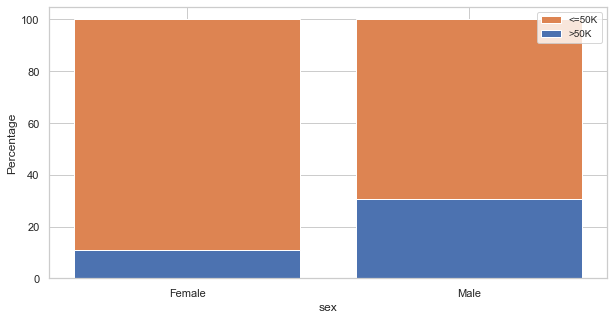

In [47]:
x = sub.iloc[0]
y = sub.iloc[1]

fig = plt.figure(figsize=(10, 5))
p1 = plt.bar(y.index, y.values)
p2 = plt.bar(x.index, x.values, bottom=y.values)
x = plt.xlabel('sex')
y = plt.ylabel('Percentage')
legend = plt.legend((p2[0], p1[0]), ('<=50K', '>50K'), fontsize=10)
plt.show()

**Interpretation**: It was observed that the males had a higher ratio when it came to earning more than 50K, which can be explained by the ratio of males and females in the population.

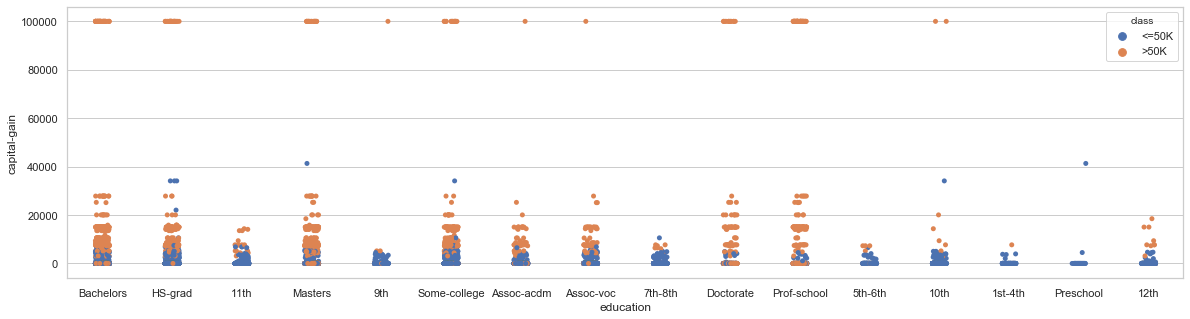

In [48]:
fig = plt.figure(figsize=(20, 5))
plot = sns.stripplot(x='education', y='capital-gain', hue='class', s=5, data=df.reset_index())
plt.show()

**Interpretation**: People with the highest degree of education as Bachelors, Masters, Doctorate and Prof-School had the most capital gains, and thus the higher percentage of people earning more than 50K annually.

## 4. Exceptional Work

#### Binarization

In [49]:
# Convert the "Class" and "Sex" column to type string
df['class'] = df['class'].astype('str')
df['sex'] = df['sex'].astype('str')

# List the counts of the values
print("Count of class values: ")
print(df['class'].value_counts())
print("\nCount of sex values: ")
print(df['sex'].value_counts())
print("\n")

# Binarize the values of this column such that income >50K = 1 and income <=50K = 0; F = 1 and M = 0;
df['class'] = (df['class'] == ">50K").astype(int)
df['sex'] = (df['sex'] == "Female").astype(int)

# List the counts of the values
print("Count of class values: ")
print(df['class'].value_counts())
print("\nCount of sex values: ")
print(df['sex'].value_counts())

Count of class values: 
<=50K    24720
>50K      7841
Name: class, dtype: int64

Count of sex values: 
Male      21790
Female    10771
Name: sex, dtype: int64


Count of class values: 
0    24720
1     7841
Name: class, dtype: int64

Count of sex values: 
0    21790
1    10771
Name: sex, dtype: int64


**Data Cleaning**

In [50]:
# Drop duplicate Values
df.drop_duplicates(subset=None, keep='first', inplace=False)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-funds
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1,False
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0,False


**Normalization of attributes**

In [51]:
# Final weight
df['fnlwgt'] = (df['fnlwgt'] - df['fnlwgt'].min()) / (df['fnlwgt'].max() - df['fnlwgt'].min()) * 10

# Hours per week
df['hours-per-week'] = (df['hours-per-week'] - df['hours-per-week'].min()) / (df['hours-per-week'].max() - df['hours-per-week'].min()) * 10

# Capital gain
df['capital-gain'] = (df['capital-gain'] - df['capital-gain'].min()) / (df['capital-gain'].max() - df['capital-gain'].min()) * 10

# Capital loss
df['capital-loss'] = (df['capital-loss'] - df['capital-loss'].min()) / (df['capital-loss'].max() - df['capital-loss'].min()) * 10

**Added an attribute**

In [52]:
df['capital-funds'] = np.logical_or(df['capital-gain'],df['capital-loss'])
print()
df['capital-funds'].value_counts()

False    28330
True      4231
Name: capital-funds, dtype: int64

**Interpretation**

Now, from the plot we can see that the attribute fnlwgt is normalized and thus, can be used in the analysis. To do this, we will perform some steps from Part 3 that will include fnlwgt.

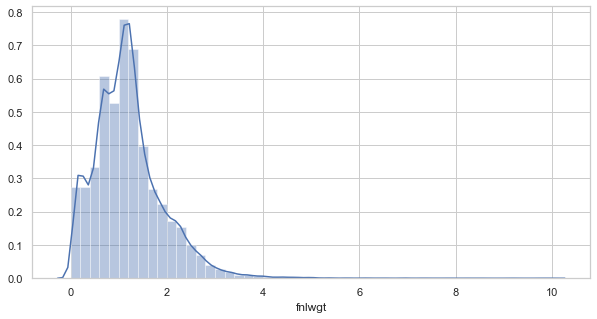

In [53]:
fig = plt.figure(figsize=(10, 5))
plot = sns.distplot(df['fnlwgt'])
plt.show()

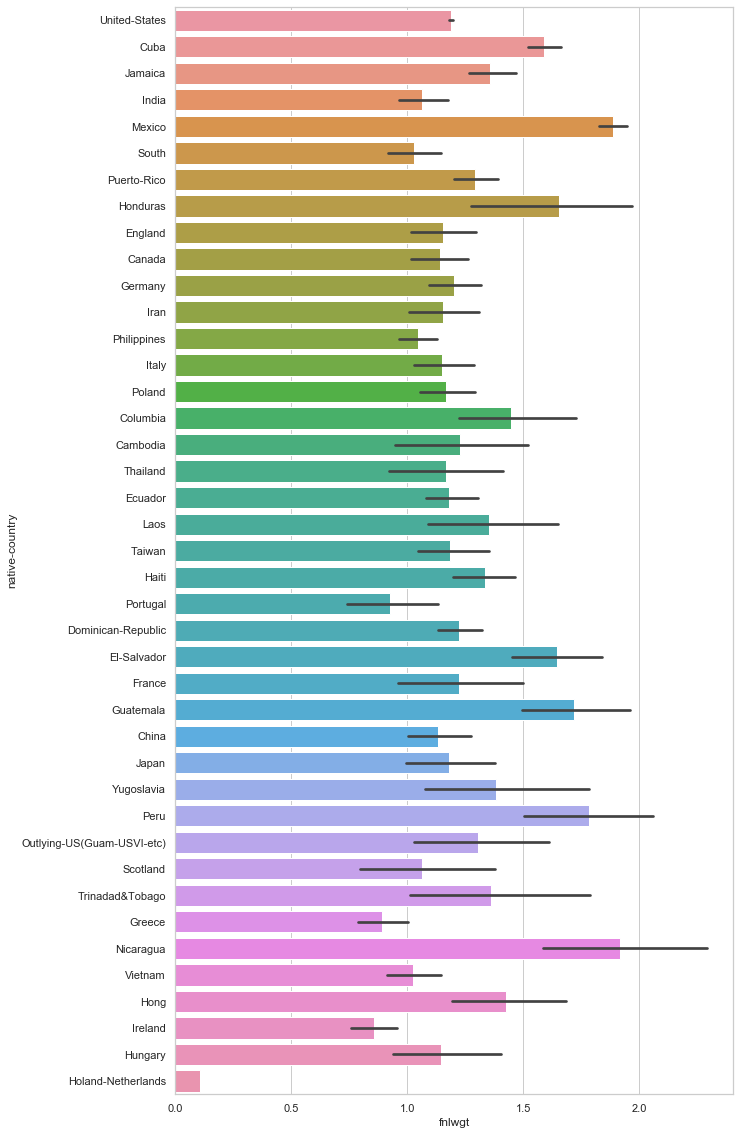

In [54]:
fig = plt.figure(figsize=(10,20))
plot = sns.barplot(y=df['native-country'], x=df['fnlwgt'])
plt.show()

**Performing PCA for n=2 components**

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
df['capital-funds'] = df['capital-funds'].astype(int)

In [57]:
df_pca = df.select_dtypes(include=['int64', 'float64'])

In [58]:
df_pca

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,class,capital-funds
0,39,0.44,13,0,0.22,0.00,3.98,0,1
1,50,0.48,13,0,0.00,0.00,1.22,0,0
2,38,1.38,9,0,0.00,0.00,3.98,0,0
3,53,1.51,7,0,0.00,0.00,3.98,0,0
4,28,2.21,13,1,0.00,0.00,3.98,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,1.66,12,1,0.00,0.00,3.78,0,0
32557,40,0.97,9,0,0.00,0.00,3.98,1,0
32558,58,0.95,9,1,0.00,0.00,3.98,0,0
32559,22,1.28,9,0,0.00,0.00,1.94,0,0


In [59]:
features = ['age',
            'education-num',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'capital-funds']

In [60]:
x = df_pca.loc[:, features].values

In [61]:
x = StandardScaler().fit_transform(x)

In [62]:
pca = PCA(n_components=2)

pc = pca.fit_transform(x)

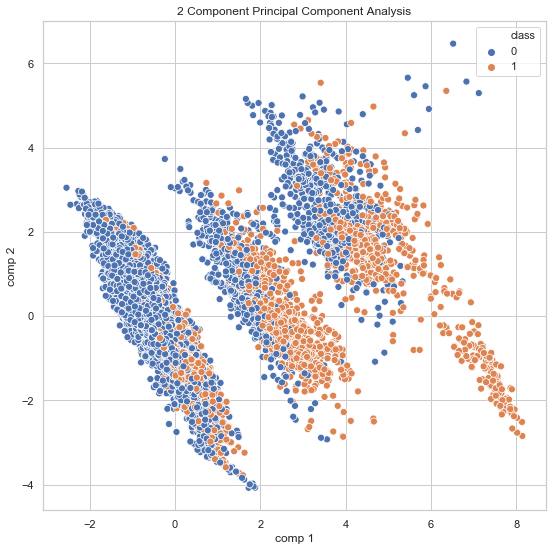

In [63]:
pca_comp = pd.DataFrame(data=pc,
                        columns=['comp 1', 'comp 2'])

plot_df = pd.concat([pca_comp, df_pca[['class']]], axis=1)

fig = plt.figure(figsize=(9, 9))
plot = sns.scatterplot(x='comp 1', y='comp 2', hue='class', data=plot_df, s=50)
t = plt.title('2 Component Principal Component Analysis')
plt.show()

**Interpretation**

We finally use all the data preprocessing steps (Binarization and Normalization) in performing a 2-component Principal Component Analysis on the numeric attributes. From the above visualization, it can be seen that using just 2 components, there are some clusters being formed, which can be used to predict the class of any new record. We can use a higher number of principal components to get more information out of the attributes. Thus, PCA is a very efficient technique to reduce the dimensionality of given data.

## Summary

The entire lab was divided into **3** major parts. We performed the Exploratory Data Analysis through those parts as we progressed through the notebook. These were:
* **Understanding the context**
* **Explore the data**
* **Exceptional work**

### Understanding the context

In this section, we describe the dataset with the help of the dataset description provided. We also answer some questions about the data asked in the instructions. The data used in this study was from US Census with each record containing data about individuals. This data was then used to predict the annual income class of that person.

### Data Analysis

We broke down the main analysis part into the following steps:
* Understanding the meaning of attributes
* Verifying data quality
* Summarising basic statistics for the attributes
* Visualized some interesting features
* Visualized interesting relationships between different attributes
* Studied the relationships between different attributes or set of attributes and the target class

### Exceptional Work

In the final section, we use all our findings to perform two data preprocessing techniques: **Binarization and Normalization**
Then, we use the new numeric attributes along with the original attributes and one new attribute that we created to perform a 2 component Principal Component Analysis on the dataset. We also visualized the output of the PCA analysis and found that there were some clusters beginning to form with just 2 components. This suggested that by performing the PCA for a higher number of components could give even better results.